In [29]:
#imports

import os
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.callbacks import Callback


In [30]:
#Loading the dataset
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

In [31]:
x_train_0 = x_full[y_full == 0][:]
x_train_8 = x_full[y_full == 8][:]
x_test_0 = x_test_full[y_test_full == 0][:]
x_test_8 = x_test_full[y_test_full == 8][:]

In [32]:
print(len(x_train_0),len(x_train_8))
print(len(x_test_0),len(x_test_8))

5923 5851
980 974


In [33]:
# Training Data
'''
TRAINING DATA
5848 - 0
5848 - 8, 6, 3, 2 
    [1462 * 4]
'''

x_train_0 = x_full[y_full == 0][:5848]
y_train_0 = np.ones((5848,))
print("shape_training_0 =>")
print("\t",x_train_0.shape)
print("\t",y_train_0.shape)

num=[2,3,6,8]
x_train_others = []
y_train_others = []
for digit in num:
    x_digit = x_full[y_full == digit][:1462]
    y_digit = np.zeros((1462,))  
    x_train_others.append(x_digit)
    y_train_others.append(y_digit)
print("lenght_training_other =>")
print("\t",len(x_train_others),len(y_train_others))

x_train_others = np.concatenate(x_train_others, axis=0)
y_train_others = np.concatenate(y_train_others, axis=0)
print("shape_training_other =>")
print("\t",x_train_others.shape)
print("\t",y_train_others.shape)

x_train = np.concatenate([x_train_0, x_train_others], axis=0)
y_train = np.concatenate([y_train_0, y_train_others], axis=0)
x_train, y_train = shuffle(x_train, y_train, random_state=42)
print("shape_training_complete =>")
print("\t",x_train.shape)
print("\t",y_train.shape)


shape_training_0 =>
	 (5848, 28, 28)
	 (5848,)
lenght_training_other =>
	 4 4
shape_training_other =>
	 (5848, 28, 28)
	 (5848,)
shape_training_complete =>
	 (11696, 28, 28)
	 (11696,)


In [34]:
# Testing Data
'''
TESTING DATA
972 - 0
972 - 2, 3, 6, 8
    [243 * 4]
'''

x_test_0 = x_test_full[y_test_full == 0][:972]
y_test_0 = np.ones((972,))
print("shape_training_0 =>")
print("\t",x_test_0.shape)
print("\t",y_test_0.shape)

num=[2,3,6,8]
x_test_others = []
y_test_others = []
for digit in num:
    x_digit = x_test_full[y_test_full == digit][:243]
    y_digit = np.zeros((243,))  
    x_test_others.append(x_digit)
    y_test_others.append(y_digit)
print("lenght_training_other =>")
print("\t",len(x_test_others),len(y_test_others))

x_test_others = np.concatenate(x_test_others, axis=0)
y_test_others = np.concatenate(y_test_others, axis=0)
print("shape_training_other =>")
print("\t",x_test_others.shape)
print("\t",y_test_others.shape)

x_test = np.concatenate([x_test_0, x_test_others], axis=0)
y_test = np.concatenate([y_test_0, y_test_others], axis=0)
x_test, y_test = shuffle(x_test, y_test, random_state=42)
print("shape_training_complete =>")
print("\t",x_test.shape)
print("\t",y_test.shape)


shape_training_0 =>
	 (972, 28, 28)
	 (972,)
lenght_training_other =>
	 4 4
shape_training_other =>
	 (972, 28, 28)
	 (972,)
shape_training_complete =>
	 (1944, 28, 28)
	 (1944,)


In [35]:
model_dense = models.Sequential()
model_dense.add(layers.Flatten(input_shape=(28, 28, 1)))
model_dense.add(layers.Dense(1, activation='sigmoid'))  
model_dense.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model_dense.summary()


model_convDense = models.Sequential()
model_convDense.add(layers.Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model_convDense.add(layers.Flatten())
model_convDense.add(layers.Dense(1, activation='sigmoid'))  
model_convDense.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)
model_convDense.summary()


c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 676)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
def load_model_weights(model, weight_dir):
    
    for layer_num, layer in enumerate(model.layers):
        file_path = os.path.join(weight_dir, f"layer_number_{layer_num}.npz")
        if os.path.exists(file_path):
            loaded = np.load(file_path)
            weights = [loaded[key] for key in loaded]
            if layer.weights: 
                layer.set_weights(weights)
                print(f"Loaded weights for layer {layer_num} from {file_path}")
            else:
                print(f"Layer {layer_num} has no weights.")
        else:
            print(f"No weights found for layer {layer_num}.")

load_model_weights(model_dense, "../InitWeightsDense")
load_model_weights(model_convDense, "../InitWeightsConvDense")

No weights found for layer 0.
Loaded weights for layer 1 from ../InitWeightsDense\layer_number_1.npz
Loaded weights for layer 0 from ../InitWeightsConvDense\layer_number_0.npz
No weights found for layer 1.
Loaded weights for layer 2 from ../InitWeightsConvDense\layer_number_2.npz


In [37]:
class SaveWeightsCallback(callbacks.Callback):
    def __init__(self, save_dir):
        super(SaveWeightsCallback, self).__init__()
        self.save_dir = save_dir

    def on_epoch_end(self, epoch, logs=None):
        epoch_dir = os.path.join(self.save_dir, f"AfterEpoch{epoch + 1}")
        if not os.path.exists(epoch_dir):
            os.makedirs(epoch_dir)
        
        for layer_num, layer in enumerate(self.model.layers):
            if layer.weights:  # Only save weights for layers that have weights
                file_path = os.path.join(epoch_dir, f"Layer_{layer_num}.npz")
                weights = layer.get_weights()
                np.savez(file_path, *weights)
                print(f"Saved weights for layer {layer_num} to {file_path}")


In [38]:
save_dir_dense = "results/Zero_WeightsDense"
save_dir_convDense = "results/Zero_WeightsConvDense"
save_weights_callback_dense = SaveWeightsCallback(save_dir_dense)
save_weights_callback_convDense = SaveWeightsCallback(save_dir_convDense)

In [39]:
history_dense = model_dense.fit(
    x_train, y_train,
    epochs=15,  
    callbacks=[save_weights_callback_dense]
)
history_convDense = model_convDense.fit(
    x_train, y_train,
    epochs=15,  
    callbacks=[save_weights_callback_convDense]
)

Epoch 1/15
342/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8443 - loss: 12.2126Saved weights for layer 1 to results/Zero_WeightsDense\AfterEpoch1\Layer_1.npz
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8500 - loss: 11.6650
Epoch 2/15
346/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9756 - loss: 0.9487Saved weights for layer 1 to results/Zero_WeightsDense\AfterEpoch2\Layer_1.npz
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9755 - loss: 0.9480
Epoch 3/15
357/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9737 - loss: 0.8643  Saved weights for layer 1 to results/Zero_WeightsDense\AfterEpoch3\Layer_1.npz
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9738 - loss: 0.8628
Epoch 4/15
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9736 - loss: 0.9280Saved weights for layer 1 to results/Zero_WeightsDense\AfterEpoch4\Layer_1.npz
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.9276
Epoch 5/15
354/366 ━━━━━━━━━━━━━━━━━━━━ 

In [40]:
test_loss, test_acc = model_dense.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

test_loss, test_acc = model_convDense.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.9783 - loss: 0.7237    
Test accuracy: 0.980967104434967
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9809 - loss: 0.0684
Test accuracy: 0.980967104434967


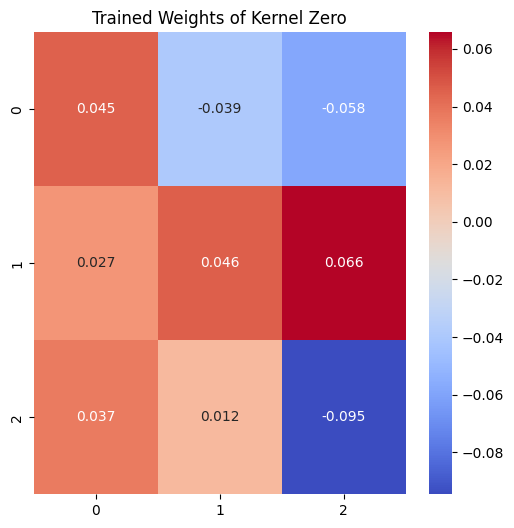

In [41]:
def plot_kernel(kernel, title):
    plt.figure(figsize=(6, 6))
    # Extract the 2D slice of the kernel weights
    kernel_2d = kernel.reshape(3,3) # Assumes single channel filter
    sns.heatmap(kernel_2d, annot=True, cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.show()
final_kernel = model_convDense.layers[0].get_weights()[0]
plot_kernel(final_kernel, 'Trained Weights of Kernel Zero')

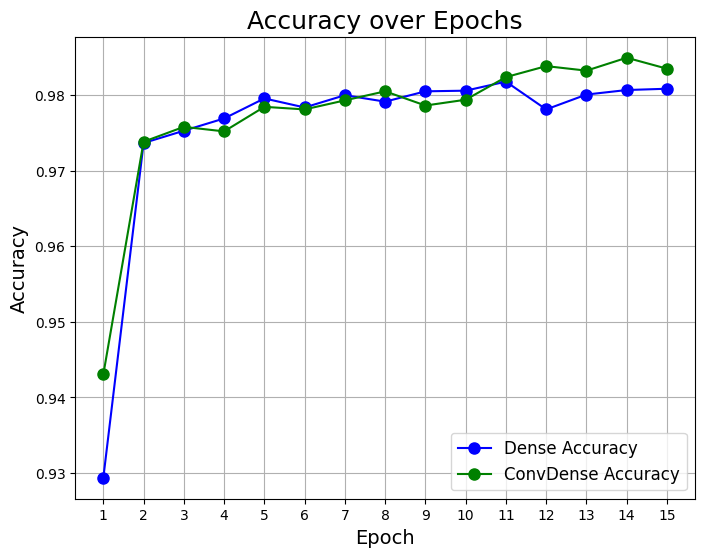

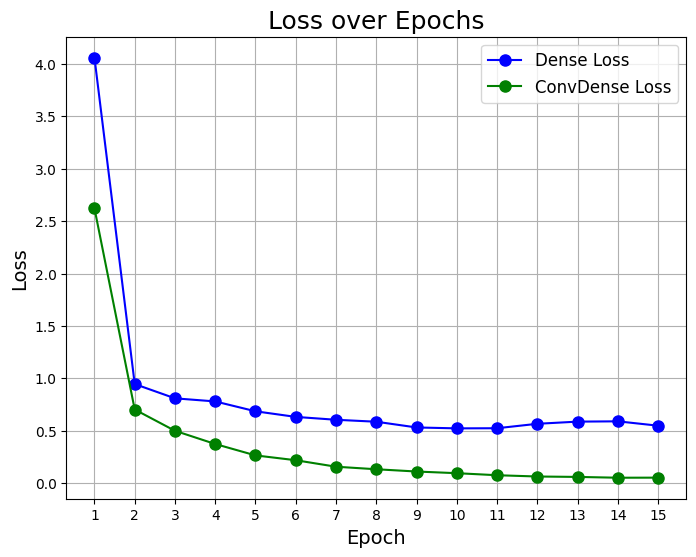

In [42]:
dense_history_dict = history_dense.history
conv_dense_history_dict = history_convDense.history
dense_accuracy = dense_history_dict['accuracy']
conv_dense_accuracy = conv_dense_history_dict['accuracy']
dense_loss = dense_history_dict['loss']
conv_dense_loss = conv_dense_history_dict['loss']

epochs = range(1, len(dense_accuracy) + 1)

# accuracy
plt.figure(figsize=(8, 6))  
plt.plot(epochs, dense_accuracy, 'bo-', label='Dense Accuracy', markersize=8)
plt.plot(epochs, conv_dense_accuracy, 'go-', label='ConvDense Accuracy', markersize=8)
plt.title('Accuracy over Epochs', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(ticks=epochs)
plt.savefig("results/zero_accuracy_plot.png", bbox_inches='tight', dpi=1000 )
plt.show()
plt.close()

# loss
plt.figure(figsize=(8, 6))  # Larger figure for better clarity
plt.plot(epochs, dense_loss, 'bo-', label='Dense Loss', markersize=8)
plt.plot(epochs, conv_dense_loss, 'go-', label='ConvDense Loss', markersize=8)
plt.title('Loss over Epochs', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(ticks=epochs)
plt.savefig("results/zero_loss_plot.png", bbox_inches='tight', dpi=1000)
plt.show()
plt.close()
